# **Mount Google Drive:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




**Verify the File Path:**

In [4]:
import os
import tarfile

# Path to the dataset file in Google Drive
file_path = '/content/drive/MyDrive/Sentiment_Analysis_Project/aclImdb_v1 .tar.gz'

# Check if the file exists
if os.path.exists(file_path):
    print(f"File found at {file_path}")
else:
    print("File not found. Please check the path.")


File found at /content/drive/MyDrive/Sentiment_Analysis_Project/aclImdb_v1 .tar.gz


# Extract the dataset


In [5]:
import tarfile

# Extracting the .tar.gz file
tar = tarfile.open(file_path, "r:gz")
tar.extractall(path='/content/aclImdb')
tar.close()

print("Dataset extracted successfully!")


Dataset extracted successfully!


# Verify the Extraction:

In [6]:
# Check directory structure
for root, dirs, files in os.walk('/content/aclImdb'):
    print(f'Root: {root}')
    print(f'Directories: {dirs}')
    print(f'Files: {files}\n')


Root: /content/aclImdb
Directories: ['aclImdb']
Files: []

Root: /content/aclImdb/aclImdb
Directories: ['train', 'test']
Files: ['README', 'imdbEr.txt', 'imdb.vocab']

Root: /content/aclImdb/aclImdb/train
Directories: ['pos', 'neg', 'unsup']
Files: ['urls_pos.txt', 'labeledBow.feat', 'urls_neg.txt', 'urls_unsup.txt', 'unsupBow.feat']

Root: /content/aclImdb/aclImdb/train/pos
Directories: []
Files: ['10413_10.txt', '2123_10.txt', '635_9.txt', '6504_10.txt', '8017_9.txt', '1731_10.txt', '8465_8.txt', '11296_8.txt', '3951_10.txt', '4535_7.txt', '3410_9.txt', '10638_8.txt', '7885_9.txt', '1500_9.txt', '10079_8.txt', '3562_8.txt', '92_9.txt', '11035_8.txt', '10558_10.txt', '12497_10.txt', '10984_10.txt', '3268_8.txt', '9749_9.txt', '11502_10.txt', '11921_10.txt', '1053_8.txt', '740_7.txt', '11632_7.txt', '4585_10.txt', '4856_10.txt', '4017_7.txt', '6380_9.txt', '11935_7.txt', '6306_10.txt', '5350_9.txt', '2942_10.txt', '339_10.txt', '3678_8.txt', '6681_10.txt', '4583_7.txt', '5397_9.txt', '

# Step 2: Data Preprocessing

Load the Data: Read the extracted text files and label them accordingly (positive/negative).
Text Cleaning: Remove unwanted characters, punctuation, and stop words, and then tokenize the text.
Split Data: Create a combined dataset and split it into training and testing sets.

Step 2: Data Preprocessing
2.1. Load the Data
We will load both the training and test data using the previously defined function.

In [7]:
import os
import pandas as pd

# Directories for positive and negative reviews in the training set
train_pos_dir = '/content/aclImdb/aclImdb/train/pos'
train_neg_dir = '/content/aclImdb/aclImdb/train/neg'

# Function to load data from a directory
def load_data_from_directory(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                data.append((file.read(), label))
    return data

# Load positive and negative reviews
train_pos_reviews = load_data_from_directory(train_pos_dir, 'positive')
train_neg_reviews = load_data_from_directory(train_neg_dir, 'negative')

# Combine the data and create a DataFrame
train_data = train_pos_reviews + train_neg_reviews
train_df = pd.DataFrame(train_data, columns=['review', 'sentiment'])

# Display the first few rows of the DataFrame
print("Training Data:")
print(train_df.head())

# Now, let's load the test data
test_pos_dir = '/content/aclImdb/aclImdb/test/pos'
test_neg_dir = '/content/aclImdb/aclImdb/test/neg'

# Load positive and negative reviews
test_pos_reviews = load_data_from_directory(test_pos_dir, 'positive')
test_neg_reviews = load_data_from_directory(test_neg_dir, 'negative')

# Combine the data and create a DataFrame
test_data = test_pos_reviews + test_neg_reviews
test_df = pd.DataFrame(test_data, columns=['review', 'sentiment'])

# Display the first few rows of the test DataFrame
print("\nTest Data:")
print(test_df.head())


Training Data:
                                              review sentiment
0  I grew up with this as my all-time favorite fi...  positive
1  Of the three remakes of this plot, I like them...  positive
2  I went to a small advance screening of this mo...  positive
3  My wife and I have watched this whole series a...  positive
4  stars: Julianna Donald, Lonny Price and Louis ...  positive

Test Data:
                                              review sentiment
0  As I have said before, I am NOT a fan of Tweet...  positive
1  **SPOILERS** Looking for a little more excitem...  positive
2  How often do we live our romantic life as on t...  positive
3  I first saw this film as a teenager (I'm now i...  positive
4  Having watched the show for about four weeks, ...  positive


Text Cleaning

In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**2.2.3. Define the Text Cleaning Function**

In [10]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    cleaned_text = ' '.join([word for word in tokens if word not in stop_words])

    return cleaned_text


In [11]:
# Clean the reviews in the training and test DataFrames
train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# Display the cleaned reviews
print("Cleaned Training Data:")
print(train_df[['review', 'cleaned_review']].head())

print("\nCleaned Test Data:")
print(test_df[['review', 'cleaned_review']].head())


Cleaned Training Data:
                                              review  \
0  I grew up with this as my all-time favorite fi...   
1  Of the three remakes of this plot, I like them...   
2  I went to a small advance screening of this mo...   
3  My wife and I have watched this whole series a...   
4  stars: Julianna Donald, Lonny Price and Louis ...   

                                      cleaned_review  
0  grew alltime favorite film special effects inc...  
1  three remakes plot like three vhs addition cop...  
2  went small advance screening movie july 19th k...  
3  wife watched whole series least three times ca...  
4  stars julianna donald lonny price louis zorich...  

Cleaned Test Data:
                                              review  \
0  As I have said before, I am NOT a fan of Tweet...   
1  **SPOILERS** Looking for a little more excitem...   
2  How often do we live our romantic life as on t...   
3  I first saw this film as a teenager (I'm now i...   
4  Having 

Step 3: Exploratory Data Analysis (EDA)
In this step, we will analyze the cleaned data to gain insights into the sentiment distribution and the most common words used in positive and negative reviews.

3.1 Sentiment Distribution

<ipython-input-12-865137b2dd8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train_df, palette='viridis')


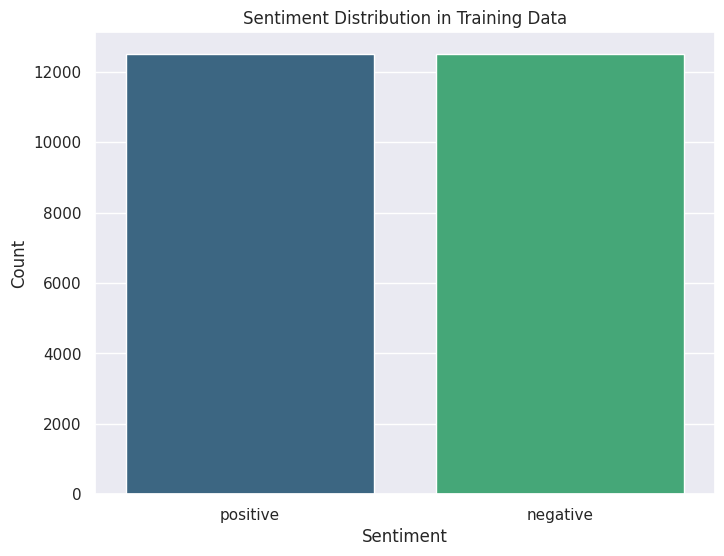

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="darkgrid")

# Plot the sentiment distribution in the training data
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_df, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Word Cloud of Positive and Negative Reviews
We’ll create word clouds to visualize the most common words in positive and negative reviews.

3.2.1. Install and Import WordCloud

In [13]:
!pip install wordcloud


In [14]:
from wordcloud import WordCloud


Generate Word Clouds

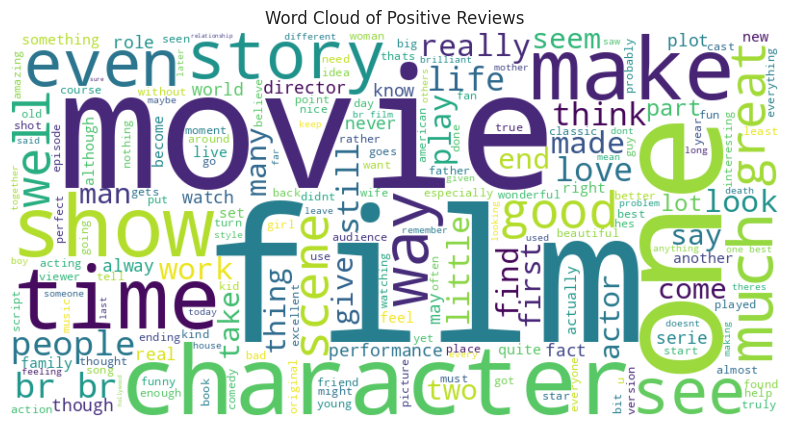

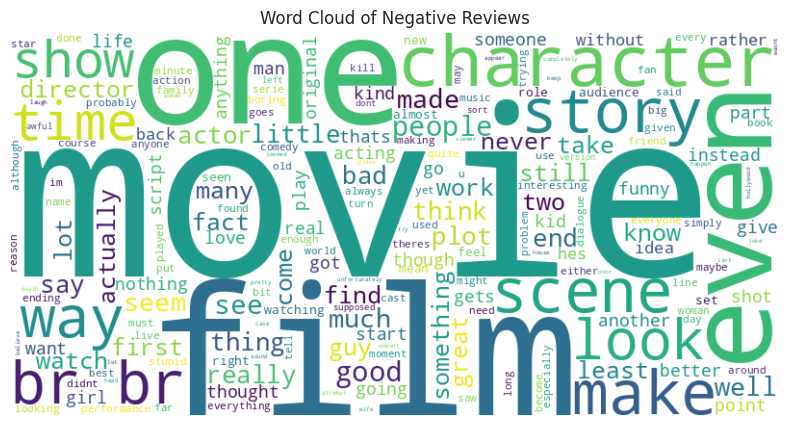

In [15]:
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine all positive and negative reviews
positive_text = ' '.join(train_df[train_df['sentiment'] == 'positive']['cleaned_review'])
negative_text = ' '.join(train_df[train_df['sentiment'] == 'negative']['cleaned_review'])

# Generate word clouds
generate_wordcloud(positive_text, 'Word Cloud of Positive Reviews')
generate_wordcloud(negative_text, 'Word Cloud of Negative Reviews')


Feature Engineering
Now, we will move on to the next stage, where we will convert these cleaned text reviews into numerical features that can be used by machine learning models.

Step 4: Feature Engineering
In this step, we'll transform the text data into a format suitable for machine learning models using the following techniques:

TF-IDF (Term Frequency-Inverse Document Frequency): A common method to represent text data in numerical form.
Word Embeddings (Optional): Techniques like Word2Vec or GloVe for representing text data in vector form.
We will start with TF-IDF:

4.1. Convert Text Data to TF-IDF Features
First, let’s import the necessary libraries:

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


4.2. Initialize and Fit TF-IDF Vectorizer

In [17]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

# Fit and transform the cleaned reviews in the training data
X_train_tfidf = tfidf.fit_transform(train_df['cleaned_review'])

# Transform the cleaned reviews in the test data
X_test_tfidf = tfidf.transform(test_df['cleaned_review'])

# Display the shape of the resulting feature matrices
print(f"TF-IDF Training Features Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Features Shape: {X_test_tfidf.shape}")


TF-IDF Training Features Shape: (25000, 5000)
TF-IDF Test Features Shape: (25000, 5000)


Step 5: Model Building

5.1. Train a Logistic Regression Model
We'll start with a simple Logistic Regression model, which is often a good baseline for text classification tasks.

5.1.1. Import Necessary Libraries

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


5.1.2. Train the Model

In [19]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)  # Increase max_iter if convergence warning occurs

# Train the model on the training data
log_reg.fit(X_train_tfidf, train_df['sentiment'])

# Make predictions on the test data
test_predictions = log_reg.predict(X_test_tfidf)


5.1.3. Evaluate the Model
evaluate the model's performance using accuracy, classification report, and confusion matrix.

In [20]:
# Calculate the accuracy
accuracy = accuracy_score(test_df['sentiment'], test_predictions)
print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(test_df['sentiment'], test_predictions))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_df['sentiment'], test_predictions))


Logistic Regression Model Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     12500
    positive       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Confusion Matrix:
[[10988  1512]
 [ 1433 11067]]


Model Optimization (Logistic Regression)
1.1. Hyperparameter Tuning using GridSearchCV
We'll use GridSearchCV to find the best hyperparameters for the Logistic Regression model. We'll tune the C parameter, which controls regularization strength, and max_iter, which controls the maximum number of iterations for convergence.

1.1.1. Import Required Libraries

In [21]:
from sklearn.model_selection import GridSearchCV


1.1.2. Define the Hyperparameter Grid

In [22]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [100, 200, 500]     # Number of iterations
}


1.1.3. Run GridSearchCV

In [23]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV with Logistic Regression and the parameter grid
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_tfidf, train_df['sentiment'])

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.2f}")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'C': 1, 'max_iter': 100}
Best Cross-Validation Accuracy: 0.88


1.1.4. Re-train the Logistic Regression Model with Best Parameters

In [24]:
# Train the Logistic Regression model with the best parameters
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train_tfidf, train_df['sentiment'])

# Predict using the test set
best_test_predictions = best_log_reg.predict(X_test_tfidf)

# Evaluate the optimized model
best_accuracy_test = accuracy_score(test_df['sentiment'], best_test_predictions)
print(f"Optimized Logistic Regression Model Test Accuracy: {best_accuracy_test:.2f}")


Optimized Logistic Regression Model Test Accuracy: 0.88


2.1. Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_df['sentiment'])

# Predict using the test set
nb_test_predictions = nb_model.predict(X_test_tfidf)

# Evaluate the model
nb_accuracy = accuracy_score(test_df['sentiment'], nb_test_predictions)
print(f"Naive Bayes Model Test Accuracy: {nb_accuracy:.2f}")


Naive Bayes Model Test Accuracy: 0.85


The Naive Bayes model achieved a test accuracy of 85%, which is slightly lower than the optimized Logistic Regression model's accuracy of 88%. This is expected because Naive Bayes assumes that all features (words) are independent, which is not always true for text data.

Support Vector Machine (SVM)
The SVM model with a linear kernel should work well for text classification problems, especially because it can find a hyperplane that separates the data points effectively.

In [26]:
from sklearn.svm import SVC

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train_df['sentiment'])

# Predict using the test set
svm_test_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the model
svm_accuracy = accuracy_score(test_df['sentiment'], svm_test_predictions)
print(f"SVM Model Test Accuracy: {svm_accuracy:.2f}")

# Classification report and confusion matrix (optional)
print("\nClassification Report for SVM:")
print(classification_report(test_df['sentiment'], svm_test_predictions))

print("\nConfusion Matrix for SVM:")
print(confusion_matrix(test_df['sentiment'], svm_test_predictions))


SVM Model Test Accuracy: 0.88

Classification Report for SVM:
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     12500
    positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Confusion Matrix for SVM:
[[10962  1538]
 [ 1543 10957]]


Random Forest
Random Forest, as an ensemble model, can capture more complex relationships in the data, potentially improving performance.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, train_df['sentiment'])

# Predict using the test set
rf_test_predictions = rf_model.predict(X_test_tfidf)

# Evaluate the model
rf_accuracy = accuracy_score(test_df['sentiment'], rf_test_predictions)
print(f"Random Forest Model Test Accuracy: {rf_accuracy:.2f}")

# Classification report and confusion matrix (optional)
print("\nClassification Report for Random Forest:")
print(classification_report(test_df['sentiment'], rf_test_predictions))

print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(test_df['sentiment'], rf_test_predictions))


Random Forest Model Test Accuracy: 0.84

Classification Report for Random Forest:
              precision    recall  f1-score   support

    negative       0.83      0.86      0.85     12500
    positive       0.86      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000


Confusion Matrix for Random Forest:
[[10753  1747]
 [ 2134 10366]]


Analysis of All Models:
Logistic Regression:

Test Accuracy: 88%
Balanced precision and recall.
Fewer false positives and false negatives compared to Random Forest.
Support Vector Machine (SVM):

Test Accuracy: 88%
Very similar performance to Logistic Regression.
Slightly more false positives compared to Logistic Regression, but still strong performance.
Naive Bayes:

Test Accuracy: 85%
Performs well but not as strong as the other two models due to independence assumptions between features.
Random Forest:

Test Accuracy: 84%
Lower accuracy and more misclassifications compared to the other models.
Summary:
Best Performing Models: Logistic Regression and SVM (both at 88%). These models are effective for this dataset.
Naive Bayes: A simpler model with slightly lower accuracy (85%).
Random Forest: Has a lower performance (84%) for this dataset, possibly due to the sparse nature of text data where ensemble methods might not be as effective without additional hyperparameter tuning.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Re-create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_review'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_review'])

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train_tfidf, train_df['sentiment'])

print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [30]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(lr_model, '/content/drive/MyDrive/Sentiment_Analysis_Project/lr_model.pkl')

# Save the TfidfVectorizer
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/Sentiment_Analysis_Project/tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


Create a Flask API
We'll create a Flask API that uses the saved model and vectorizer to predict the sentiment of a given review. We'll deploy this API in Google Colab using flask-ngrok so that we can test it with a publicly accessible URL.

1. Install Flask and Flask-Ngrok
install the necessary libraries:

In [31]:
!pip install flask-ngrok


2. Create and Run the Flask Application